[[ 0.77865955  0.75529665 -1.61162665]
 [ 0.40443193 -0.04197183 -1.07659816]
 [-0.22821877 -1.38979448 -0.17210546]
 ..., 
 [ 0.92601119  1.06922008 -1.82229343]
 [-0.09787519 -1.11210565 -0.35845603]
 [ 0.73134451  0.65449493 -1.54398094]]


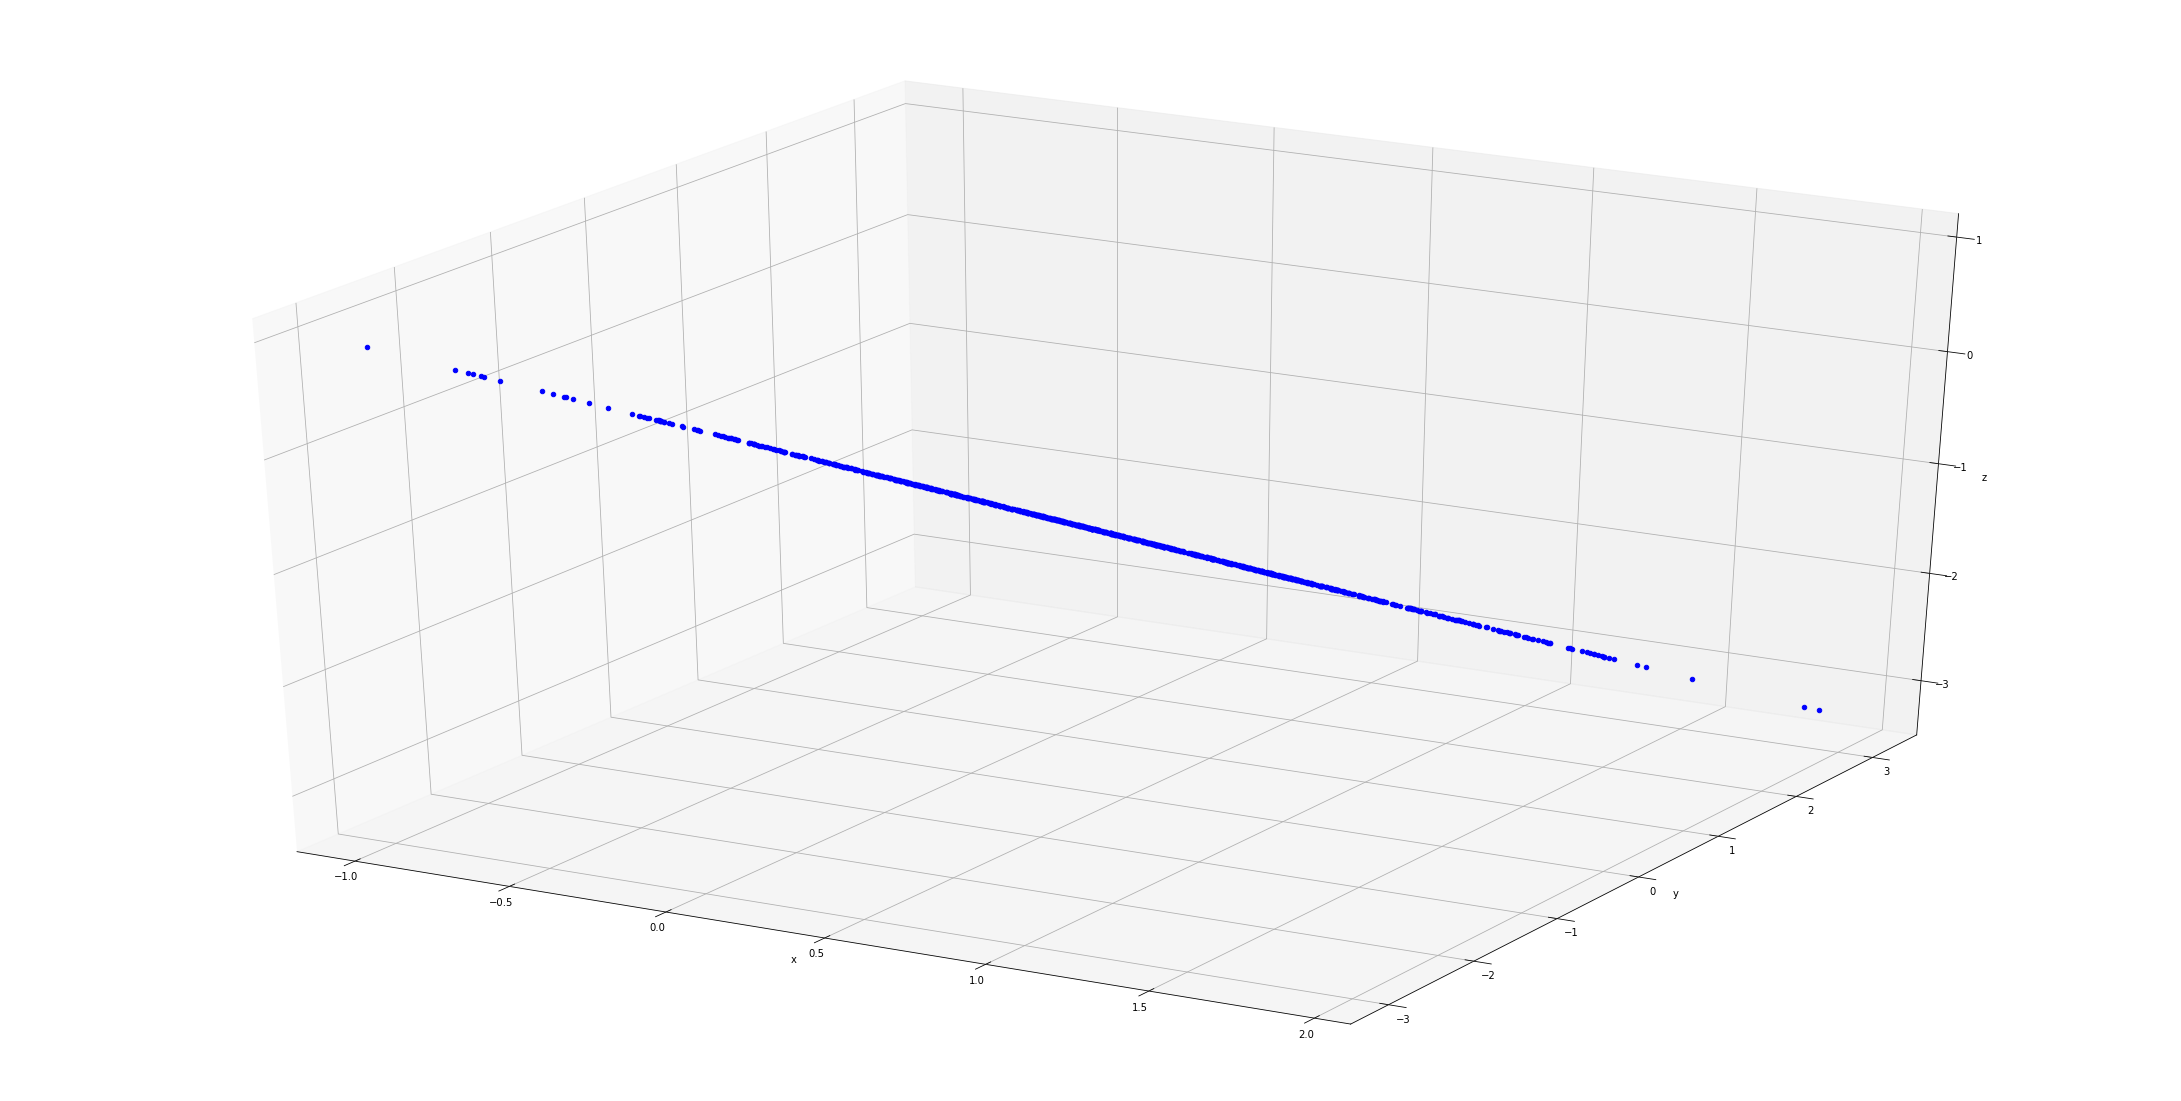

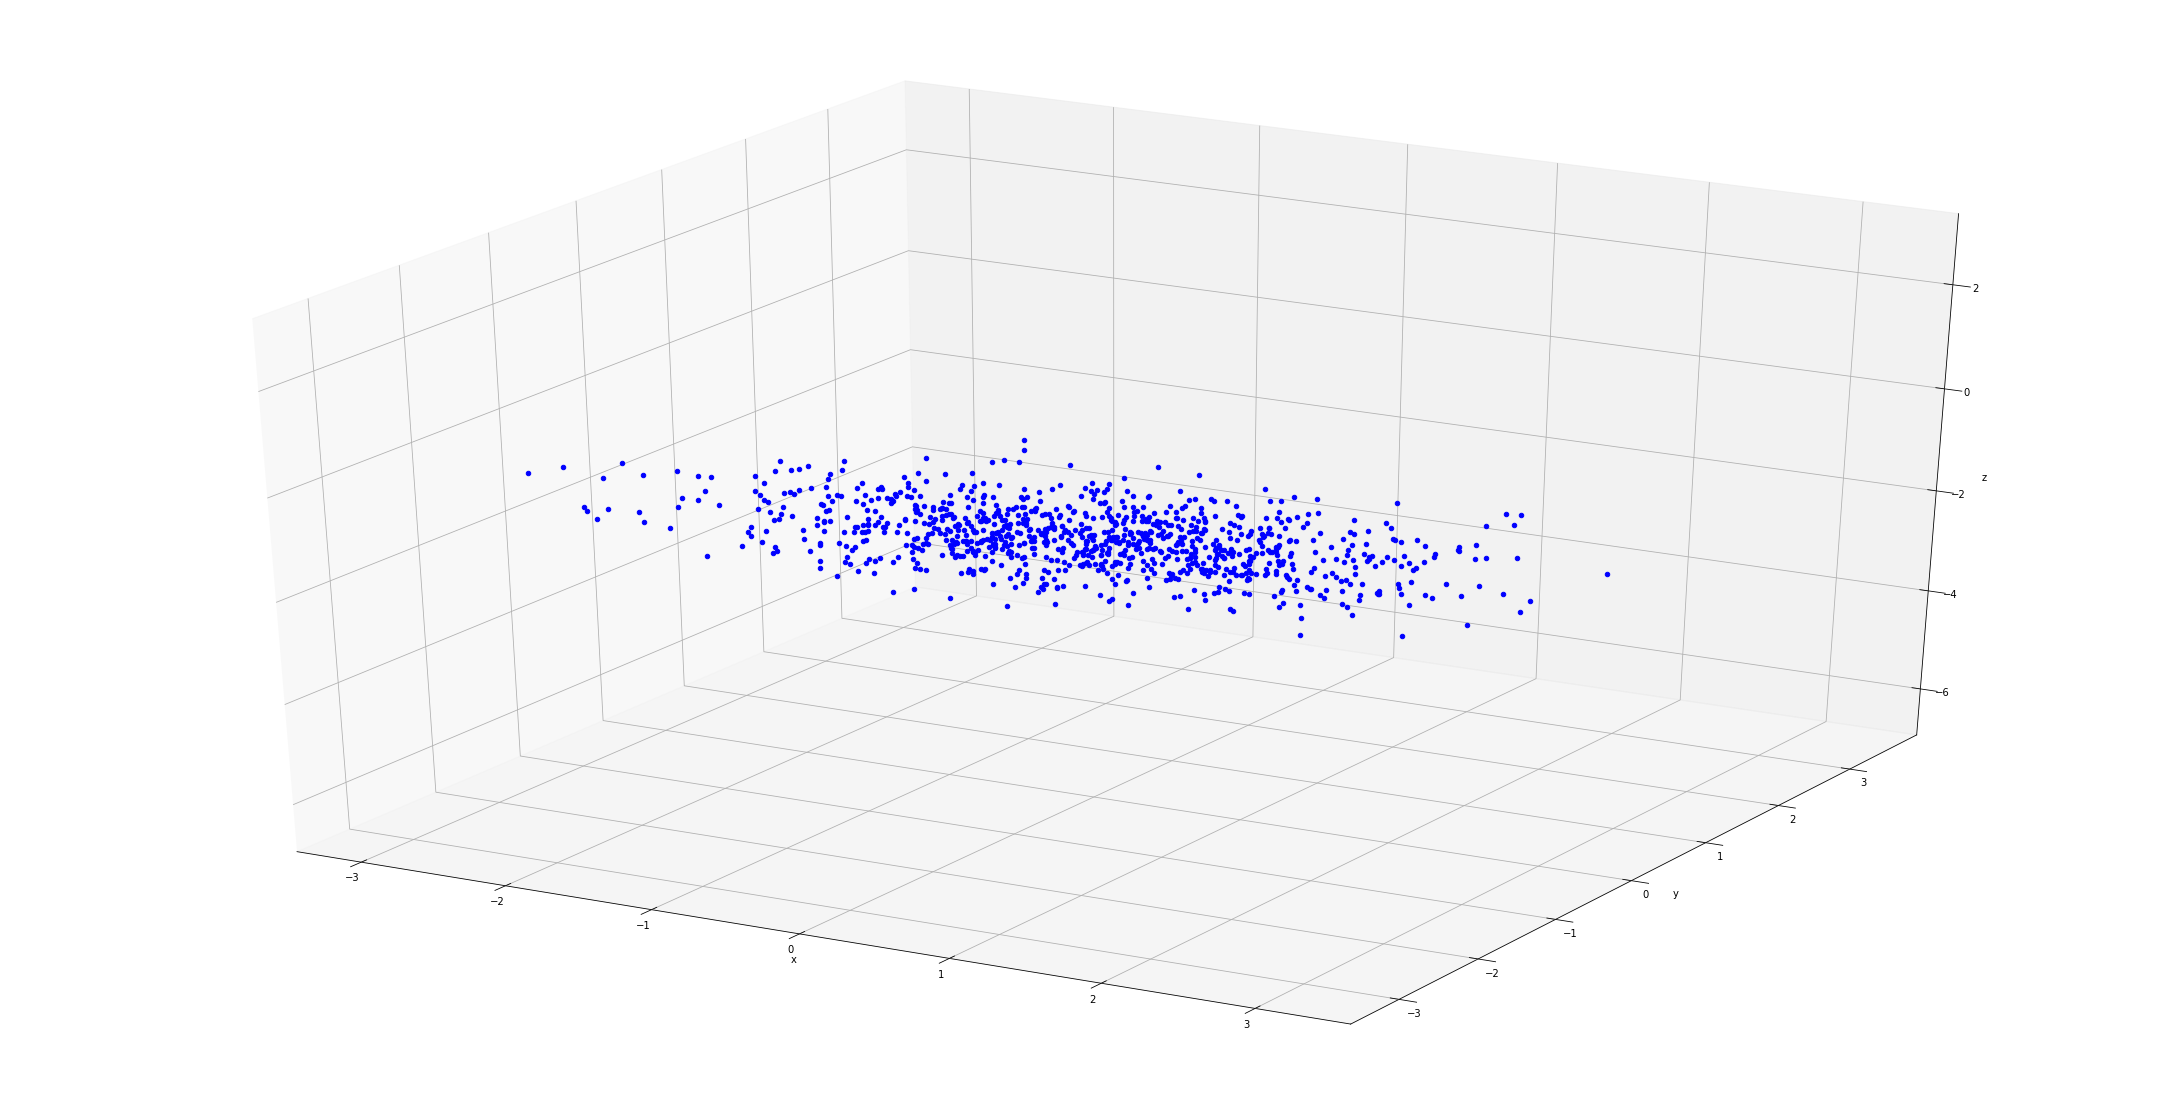

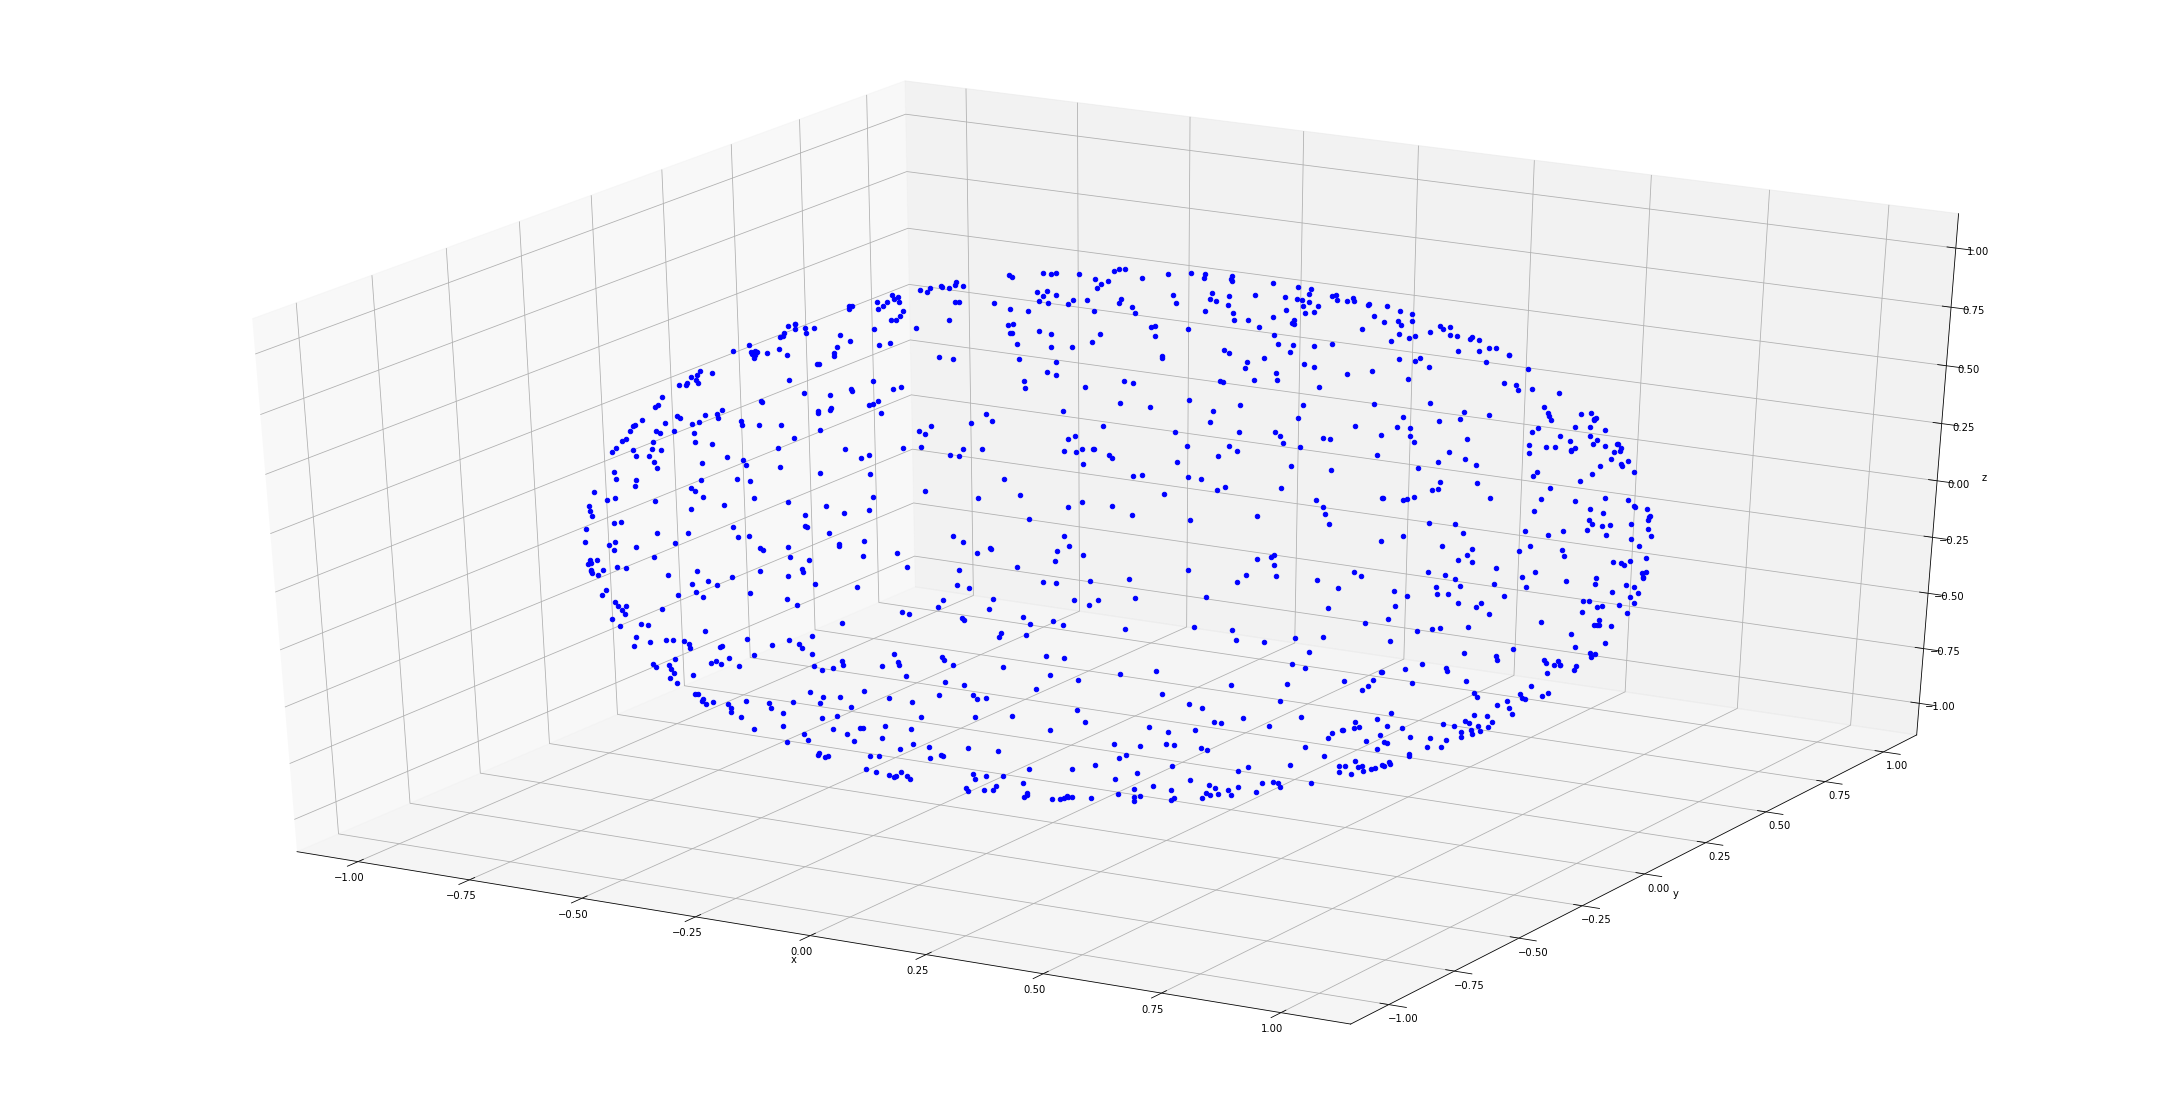

[NbConvertApp] Converting notebook Sampling_Points_GEO.ipynb to script
[NbConvertApp] Writing 3442 bytes to Sampling_Points_GEO.py
1289
2289


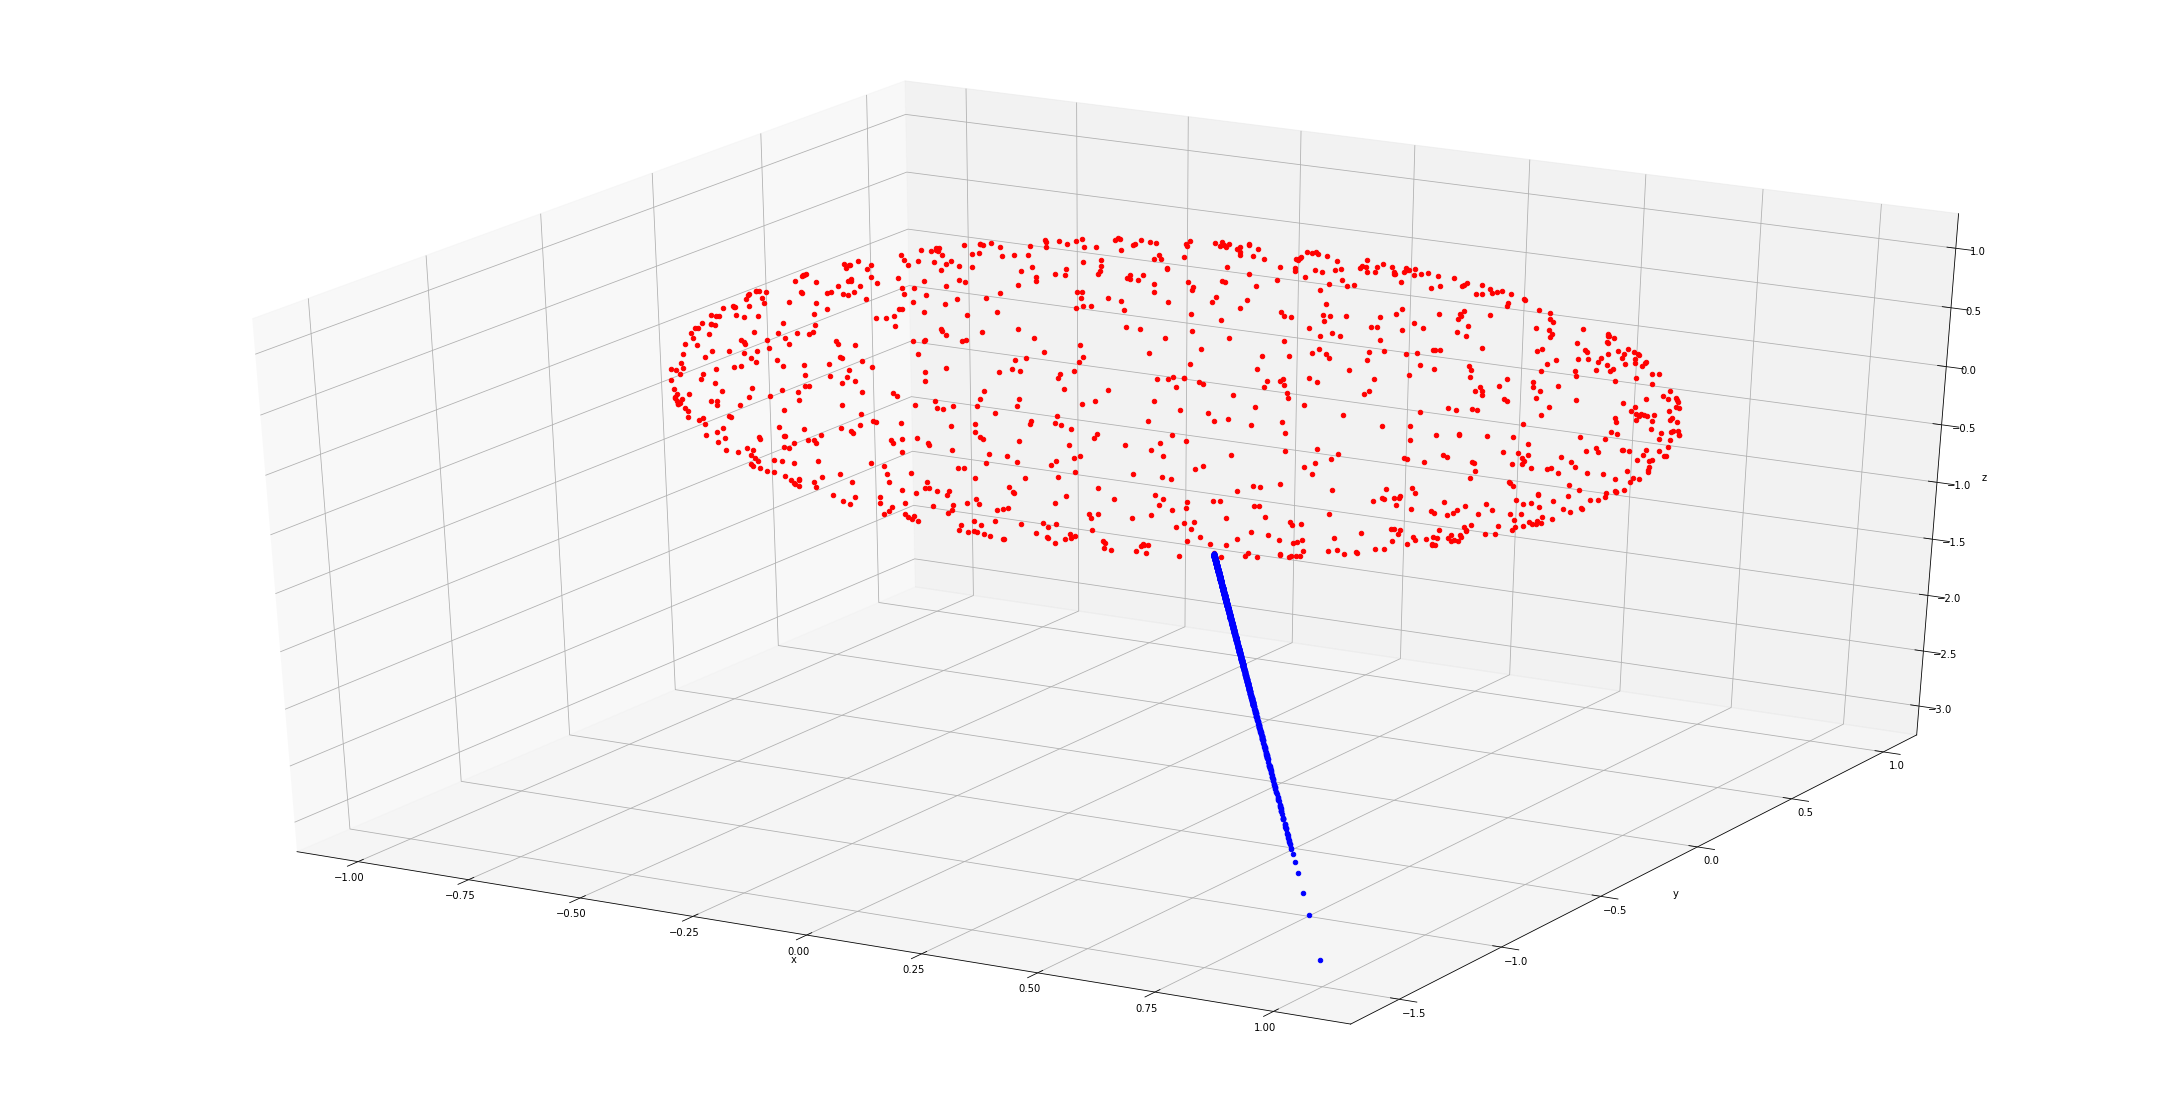

[NbConvertApp] Converting notebook Sampling_LineSphere_OS.ipynb to script
[NbConvertApp] Writing 3562 bytes to Sampling_LineSphere_OS.py


In [1]:
#%run 
import Sampling_Points_GEO as SPI
from Sampling_Points_GEO import *
import Sampling_LineSphere_OS as SPS
from Sampling_LineSphere_OS import *

In [15]:
import numpy as np
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from numpy.random import rand
from pylab import figure
%matplotlib inline

# Sampling three points to form two vectors

In [16]:
#three points
p1=(SPI.S[1][0],SPI.S[1][1],SPI.S[1][2])
p2=(SPI.S[2][0],SPI.S[2][1],SPI.S[2][2])
p3=(SPI.S[3][0],SPI.S[3][1],SPI.S[3][2])
SP_Sphere=SPI.S.tolist()
SP_Plane=[]

In [17]:
#two vectors
p1=np.asarray(p1, dtype=None, order=None)
p2=np.asarray(p2, dtype=None, order=None)
p3=np.asarray(p3, dtype=None, order=None)
v1=p1-p3
v2=p2-p3


In [18]:
#normal vector(taking cross product to obtain)
normal_vec=np.cross(v1,v2)

# Solve for plane

In [19]:

for int in range(1000) :
    sample_coord = 2*(np.random.random(2)-1/2) 
    first_coords = sample_coord - p1[0:2]
    last_coord = -(np.dot(normal_vec[0:2], first_coords)-
                   normal_vec[2]*p1[2])/normal_vec[2] 
    sample_coord = np.append(sample_coord, last_coord) 
    SP_Plane.append(sample_coord)


# Remove all points within sphere

In [20]:
sphere_plane_OS=[]
for i in SP_Plane:
    if (i[0]**2+i[1]**2+i[2]**2>=1):
        sphere_plane_OS.append((i[0],i[1],i[2]))

# Visual

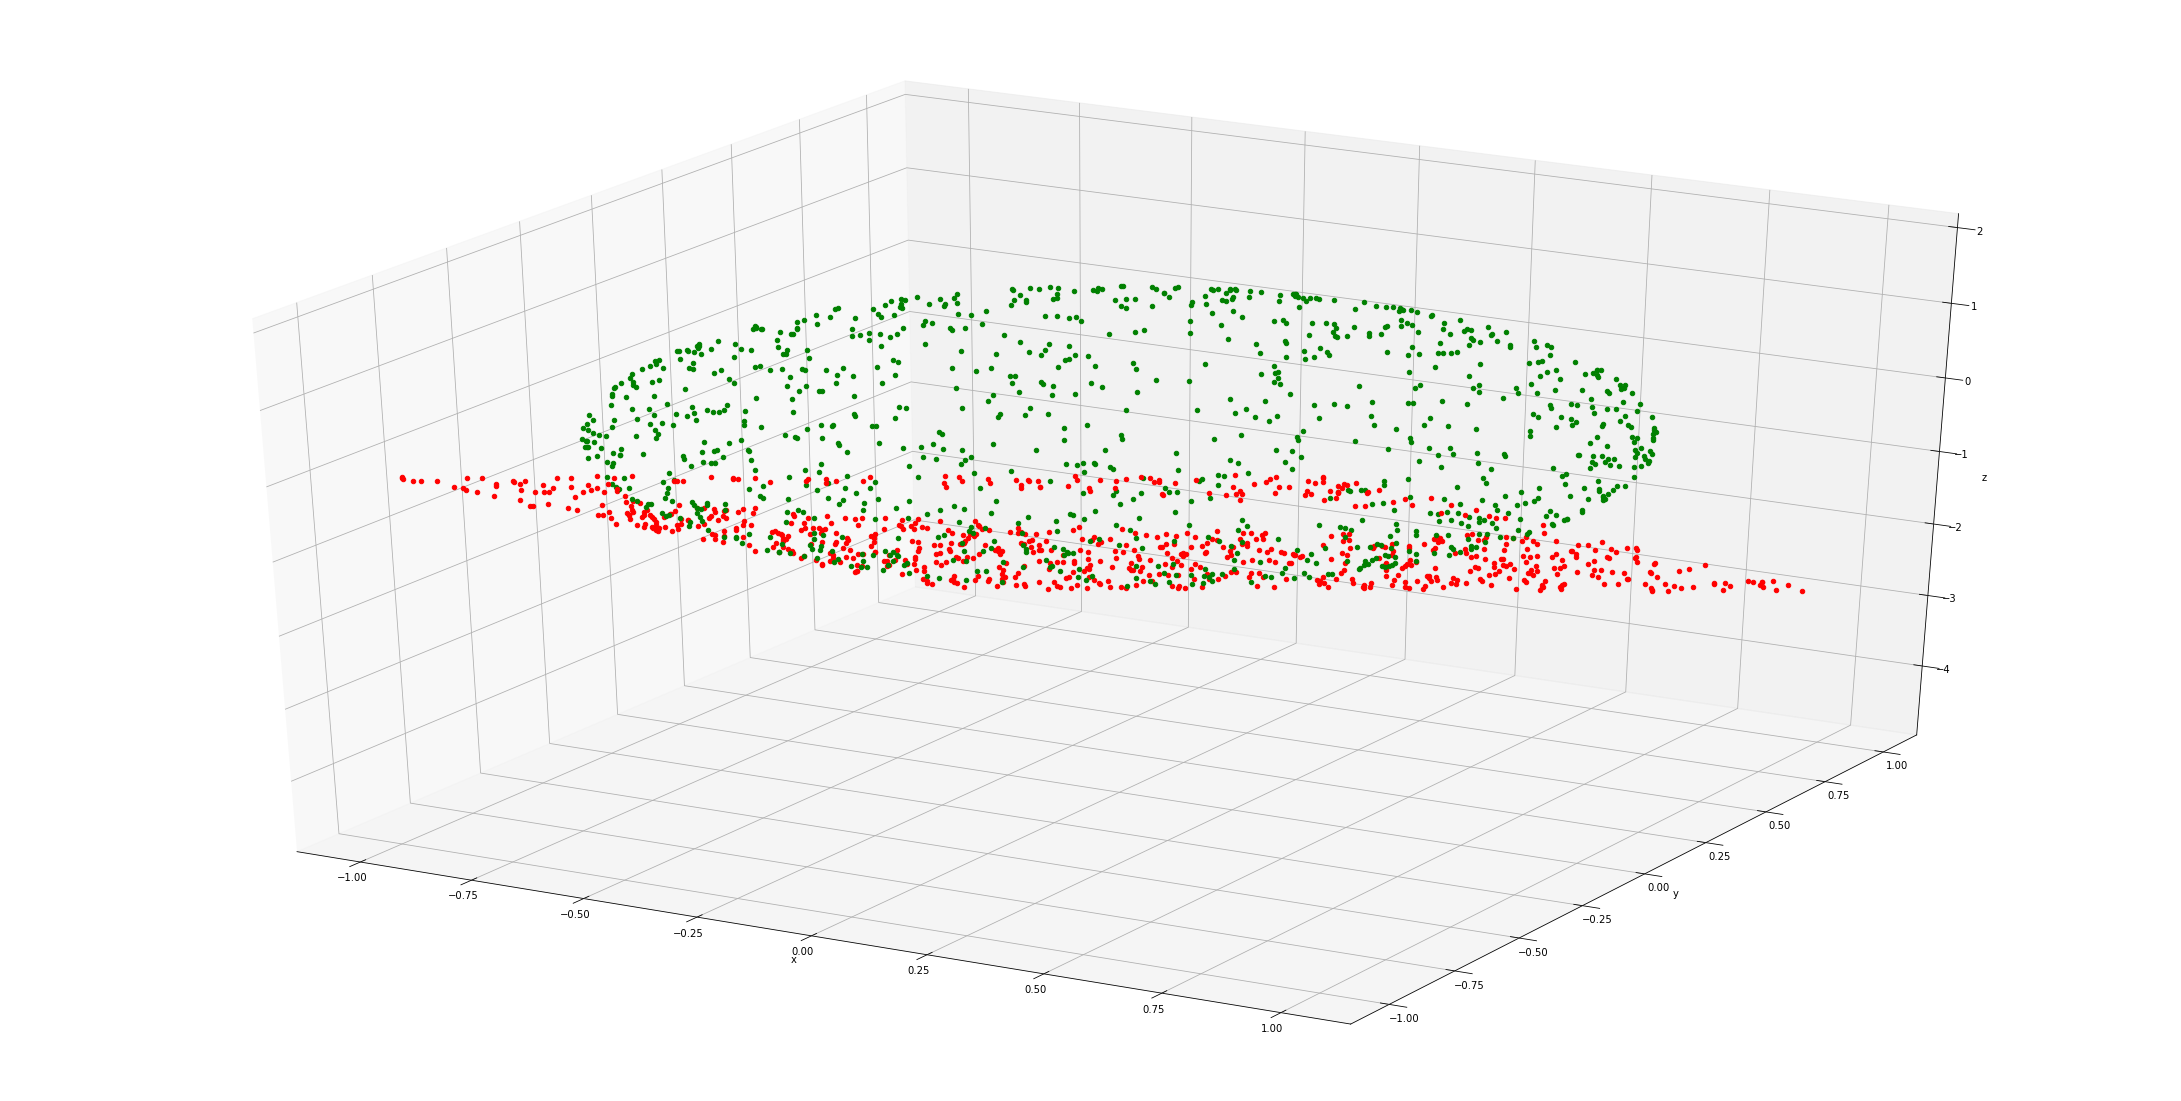

In [21]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from numpy.random import rand
from pylab import figure


#S=SPI.S# m is an array of (x,y,z) coordinate triplets
#L=SPS.sphere_line_OS
#S=sphere_plane
#print(len(L))
#print(len(S))
#print(len(P))

fig=figure(figsize=(30,15))
##fig = figure()
ax = Axes3D(fig)

    
for i in range(len(SP_Sphere)): #plot each point + it's index as text above
    ax.scatter(SP_Sphere[i][0],SP_Sphere[i][1],SP_Sphere[i][2],color='g')
    
#for i in range(len(L)): #plot each point + it's index as text above
    #ax.scatter(L[i][0],L[i][1],L[i][2],color='b')
    
for i in range(len(sphere_plane_OS)): #plot each point + it's index as text above
    ax.scatter(sphere_plane_OS[i][0],sphere_plane_OS[i][1],sphere_plane_OS[i][2],color='r')



ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
#pyplot.show()

pyplot.show()

# Adding a line to the figure

In [22]:
# Sample two other point on sphere
p4=(SPI.S[4][0],SPI.S[4][1],SPI.S[4][2])
p5=(SPI.S[5][0],SPI.S[5][1],SPI.S[5][2])
p4=np.asarray(p4, dtype=None, order=None)
p5=np.asarray(p5, dtype=None, order=None)
v=p5-p4
v=5*v
parameter = np.transpose(abs(np.random.randn(1000)[np.newaxis]))
geo_line=parameter*v
geo_line=geo_line.tolist()
sphere_line_plane_OS=[]
for i in geo_line:
    if (i[0]**2+i[1]**2+i[2]**2>=1):
        sphere_line_plane_OS.append((i[0],i[1],i[2]))

# Visual

In [23]:
p4=(SPI.S[4][0],SPI.S[4][1],SPI.S[4][2])
p5=(SPI.S[4][0],SPI.S[4][1],SPI.S[4][2])
p4=np.asarray(p1, dtype=None, order=None)
p5=np.asarray(p2, dtype=None, order=None)
v=p5-p4
Scale_L=5*v
#vector on the sphere
#print(Scale_L)
#random parameters for scaling
parameter = np.transpose(abs(np.random.randn(1000)[np.newaxis]))
#Sampling from vector on the sphere
sphere_line=parameter*Scale_L
sphereline_list=sphere_line.tolist()
sphere_line_OS=[]
for i in sphere_line:
    if (i[0]**2+i[1]**2+i[2]**2>=1):
        sphere_line_OS.append((i[0],i[1],i[2]))
#test code: should be equal to 1000

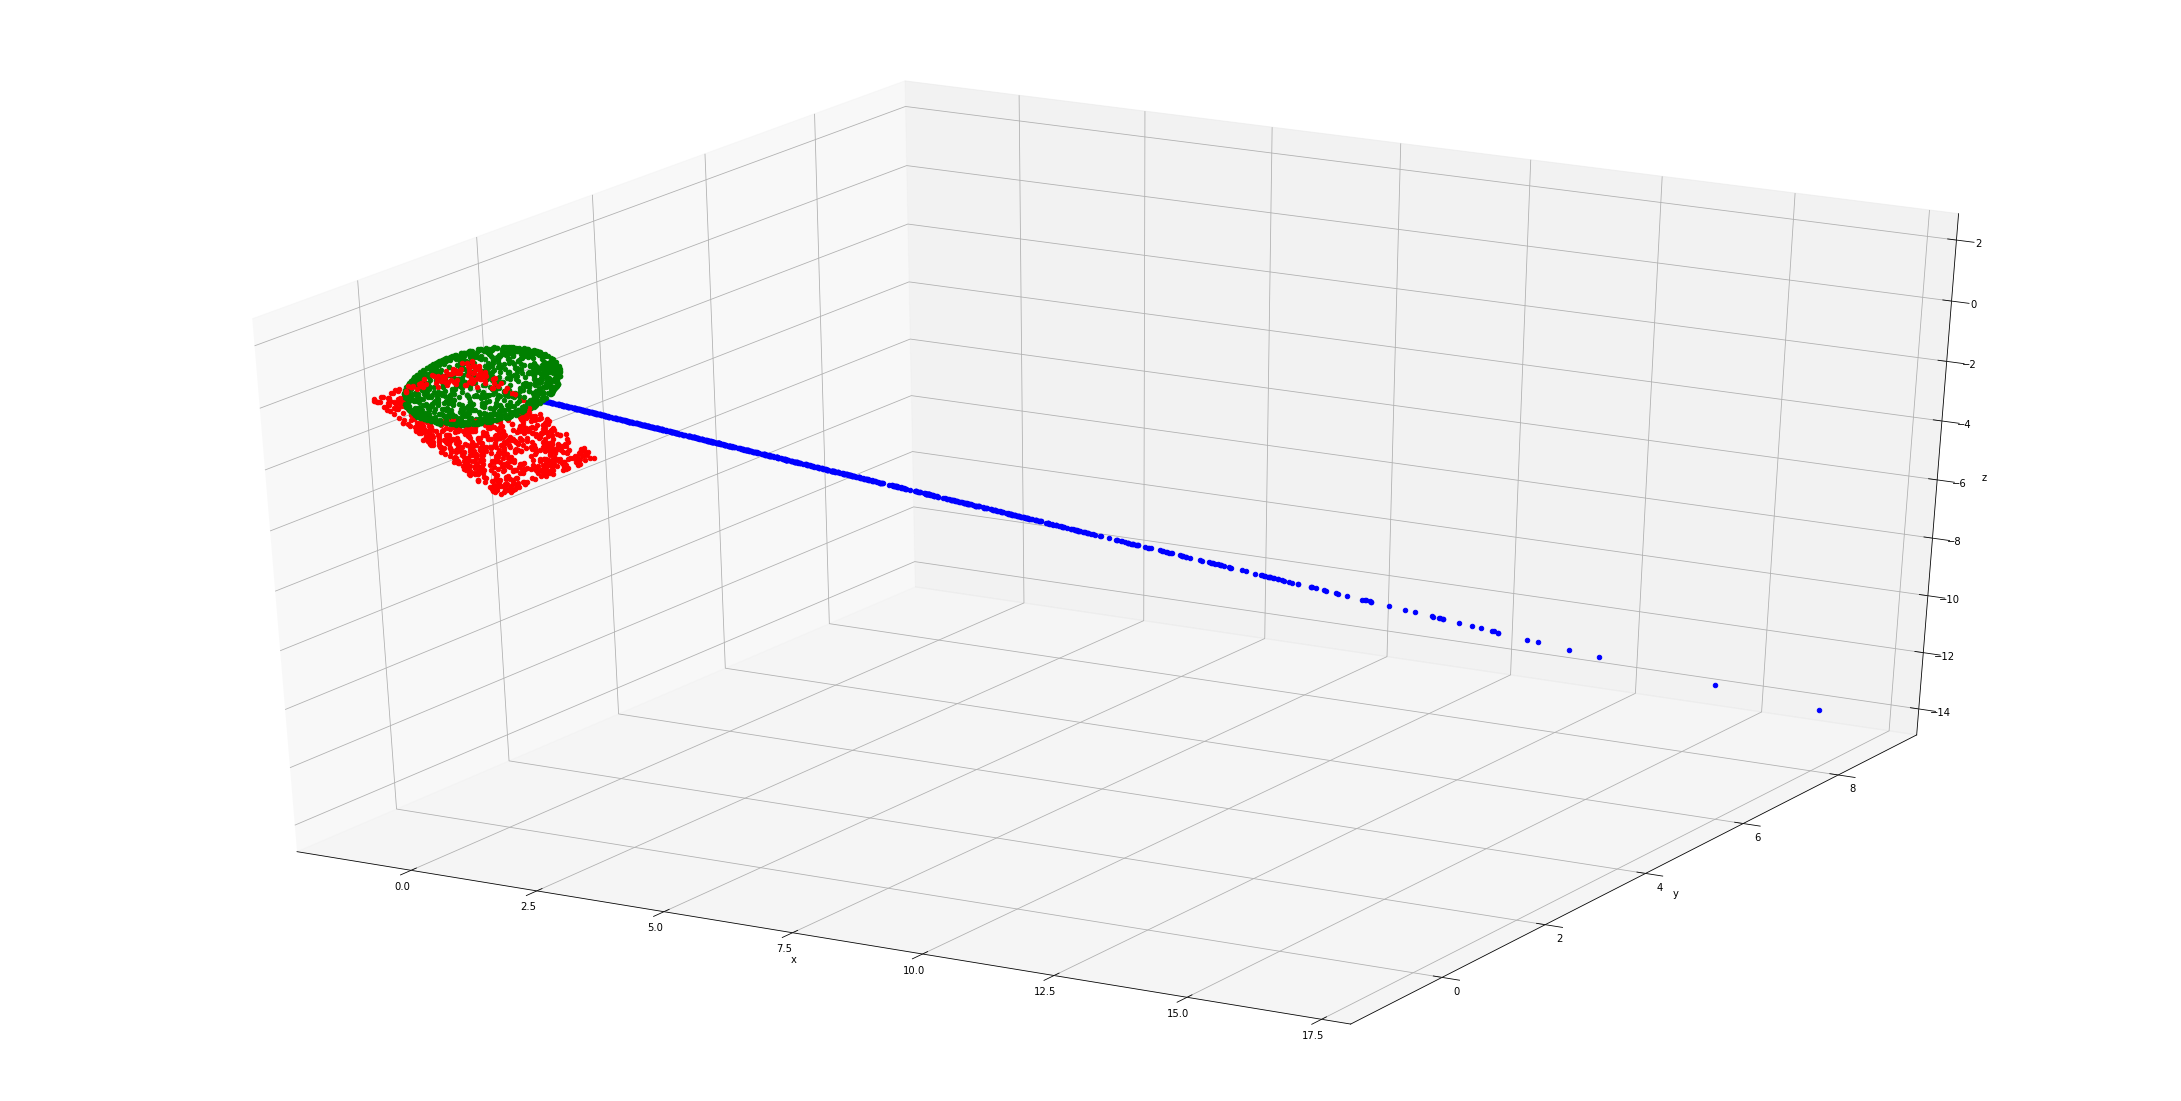

In [24]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from numpy.random import rand
from pylab import figure


#S=SPI.S# m is an array of (x,y,z) coordinate triplets
#L=SPS.sphere_line_OS
#S=sphere_plane
#print(len(L))
#print(len(S))
#print(len(P))

fig=figure(figsize=(30,15))
##fig = figure()
ax = Axes3D(fig)

    
for i in range(len(SP_Sphere)): #plot each point + it's index as text above
    ax.scatter(SP_Sphere[i][0],SP_Sphere[i][1],SP_Sphere[i][2],color='g')
    
for i in range(len(sphere_line_plane_OS)): #plot each point + it's index as text above
    ax.scatter(sphere_line_plane_OS[i][0],sphere_line_plane_OS[i][1],sphere_line_plane_OS[i][2],color='b')
    
for i in range(len(sphere_plane_OS)): #plot each point + it's index as text above
    ax.scatter(sphere_plane_OS[i][0],sphere_plane_OS[i][1],sphere_plane_OS[i][2],color='r')



ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
#pyplot.show()

pyplot.show()

In [25]:
LSP=[]
for i in range(len(SP_Sphere)):
    LSP.append(SP_Sphere[i])
for i in range(len(sphere_line_plane_OS)):
    LSP.append(sphere_line_plane_OS[i]) 
for i in range(len(sphere_plane_OS)):
    LSP.append(sphere_plane_OS[i])  
    
print(len(LSP))
#LS_Lsample=L[0:10]
#LS_Ssample=S[0:10]

2672


In [26]:

# LS=[]
# for i in range(100):
#     LS.append(S[i])
# for i in range(1000):
#     LS.append(L[i]) 
# #for i in range(len(SP)):
#     #LSP.append(SP[i])  
    
# print(len(LS))
# #LS_Lsample=L[0:10]
# #LS_Ssample=S[0:10]

In [27]:
# SP=[]
# for i in range(200):
#     SP.append(S[i])
# # for i in range(len(LS)):
# #     LS.append(LS[i]) 
# for i in range(1000):
#     SP.append(P[i])  
    
# print(len(SP))  

In [28]:
# np.linalg.svd(Y)[1]

In [29]:
# np.linalg.svd(SP)[1]

In [30]:
# SVD_SP=np.linalg.svd(SP)
# SVD_LS=np.linalg.svd(LS)
# SVD_LSP=np.linalg.svd(LSP)


In [31]:
!jupyter nbconvert --to script Sampling_PlaneSphere.ipynb

[NbConvertApp] Converting notebook Sampling_PlaneSphere.ipynb to script
[NbConvertApp] Writing 5374 bytes to Sampling_PlaneSphere.py
